In [21]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_data = pd.merge(ride_data, city_data, how ="left", on=["city", "city"])

# Display the data table for preview
city_ride_data.head()
#city_ride_data

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

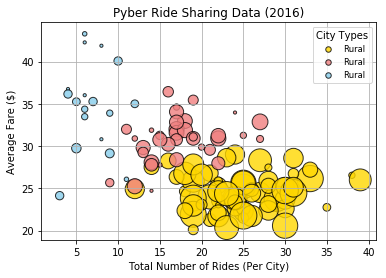

In [22]:
# Obtain the x and y coordinates for each of the three city types
urban_cities = city_ride_data[city_ride_data["type"]=="Urban"]
suburban_cities = city_ride_data[city_ride_data["type"]=="Suburban"]
rural_cities = city_ride_data[city_ride_data["type"]=="Rural"]

urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_cities.groupby(["city"]).mean()["fare"]
urban_driver_count = urban_cities.groupby(["city"]).mean()["driver_count"]


suburban_ride_count = suburban_cities.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_cities.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]


rural_ride_count = rural_cities.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_cities.groupby(["city"]).mean()["fare"]
rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]



# Build the scatter plots for each city types
plt.scatter(urban_ride_count,
           urban_avg_fare,
           s=10*urban_driver_count, c="gold",
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Rural")

plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=10*suburban_driver_count, c="lightcoral",
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Rural")

plt.scatter(rural_ride_count,
         rural_avg_fare,
           s=10*rural_driver_count, c="skyblue",
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Rural")
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded",
                 numpoints=1, scatterpoints=1,
                 loc="best", title="City Types",
                 labelspacing=0.5)

#lgnd.legendHandles[0].sizes

lgnd.legendHandles[0]._sizes=[30]
lgnd.legendHandles[1]._sizes=[30]
lgnd.legendHandles[2]._sizes=[30]
# Incorporate a text label regarding circle size

# Save Figure


In [ ]:
#Obervation 1: I was unable to get the legend correct, but the gold represents urban, lightcoral:suburban, skyblue:rural but
 #           my takeaway is that the total number of rides are clearly more for urban areas but the average fare tends
    # to be higher for rural areas. That stands to reason because in rural areas you have a longer distance to drive and
    # vice versa for urban areas. Urban areas are obviously more populated so there are more rides.

In [7]:
# Show plot
plt.show()

## Total Fares by City Type

Text(0.5,1,'% of Total Fares by City Type')

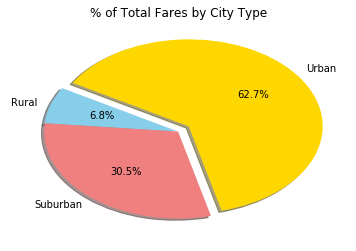

In [23]:
# Calculate Type Percents
type_percents = 100 * city_ride_data.groupby(["type"]).sum()['fare'] / city_ride_data["fare"].sum()

# Build Pie Chart
plt.pie(type_percents,
       labels=["Rural", "Suburban", "Urban"],
       colors=["skyblue", "lightcoral", "gold"],
       explode=[0, 0, 0.1],
       autopct='%1.1f%%',
       shadow=True, startangle=150)

plt.title("% of Total Fares by City Type")
# Save Figure


In [ ]:
#obervation 2: For the same reasons as obervation 1 the percentages of total fares is much larger in urban and subrurban
# areas than rural areas. The data supports the common sense as to why

In [9]:
# Show Figure
plt.show()

## Total Rides by City Type

Text(0.5,1,'% of Total Rides by City Type')

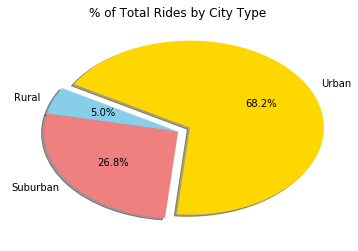

In [10]:
# Calculate Ride Percents
type_percents = 100 * city_ride_data.groupby(["type"]).sum()['ride_id'] / city_ride_data["ride_id"].sum()

# Build Pie Chart
plt.pie(type_percents,
       labels=["Rural", "Suburban", "Urban"],
       colors=["skyblue", "lightcoral", "gold"],
       explode=[0, 0, 0.1],
       autopct='%1.1f%%',
       shadow=True, startangle=150)

plt.title("% of Total Rides by City Type")

# Save Figure


In [11]:
# Show Figure
plt.show()

## Total Drivers by City Type

Text(0.5,1,'% of Total Drivers by City Type')

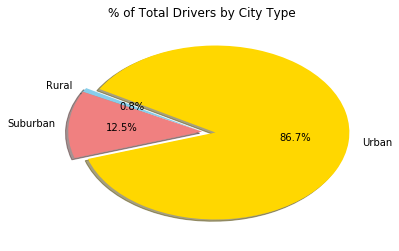

In [16]:
# Calculate Driver Percents
type_percents = 100 * city_ride_data.groupby(["type"]).sum()['driver_count'] / city_ride_data["driver_count"].sum()


# Build Pie Charts
plt.pie(type_percents,
       labels=["Rural", "Suburban", "Urban"],
       colors=["skyblue", "lightcoral", "gold"],
       explode=[0, 0, 0.1],
       autopct='%1.1f%%',
       shadow=True, startangle=150)

plt.title("% of Total Drivers by City Type")

# Save Figure


In [ ]:
#obersation 3: speaking to the last two pie charts, it's the same as obersation 1: it's nice when the data supports
# intuitive thinking.  There are more drivers, more fares, more rides in urban and suburban areas

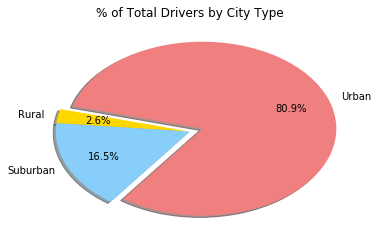

In [6]:
# Show Figure
plt.show()